#### Time Series Forecasting with XGBoost - Use python and machine learning to predict energy consumption

In [205]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')



Explore Data

In [206]:
# Load dataset
df = pd.read_csv("dataset/Houly_Energy_Consumption.csv")

# Set Datetime as index
df = df.set_index ('Datetime')
df.index = pd.to_datetime(df.index)

In [207]:
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [208]:
df = df.rename (columns={'AEP_MW':'PJME_MW'})

In [209]:
# Top data
df.head()

,PJME_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [210]:
# Bottom data
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0
2018-01-01 23:00:00,20415.0
2018-01-02 00:00:00,19993.0


In [211]:
# Data shape
df.shape

(121273, 1)

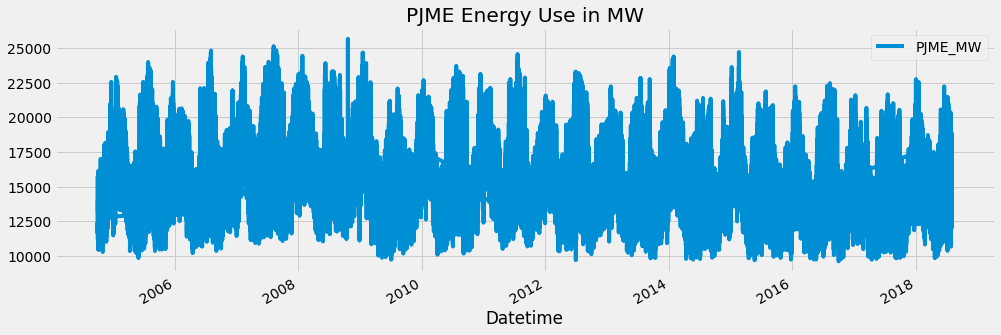

In [212]:
# Plotting data

df.plot (style='-', figsize=(15,5),
         color=color_pal[0],
         title='PJME Energy Use in MW')
plt.show()

Train / Test Split

In [213]:
#Split

train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

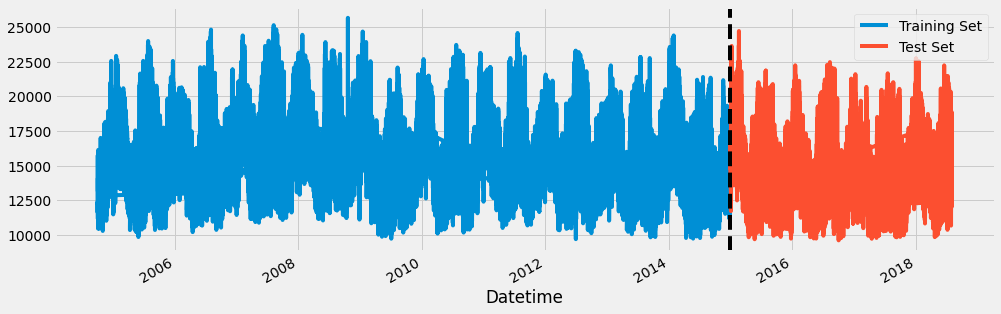

In [214]:
# Plot Split
fig, ax =  plt.subplots(figsize=(15, 5))
train.plot (ax = ax, label = 'Training Set')
test.plot (ax = ax, label = 'Test Set')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Training Set', 'Test Set'])
ax.axvline('01-01-2015', color='black', ls='--')


plt.show()

Feature Creation

In [215]:
# Create time series features based on time series index.

def create_features(df):
    df.copy
    df['hour'] = df.index.hour
    df['dayofweeok'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [216]:
df = create_features(df)

In [217]:
# Train / Test

train = create_features(train)
test = create_features(test)

C:\Users\IGOR\AppData\Local\Temp\ipykernel_12448\1812170942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\IGOR\AppData\Local\Temp\ipykernel_12448\1812170942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweeok'] = df.index.dayofweek
C:\Users\IGOR\AppData\Local\Temp\ipykernel_12448\1812170942.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Visualize our Feature / Target Relationship

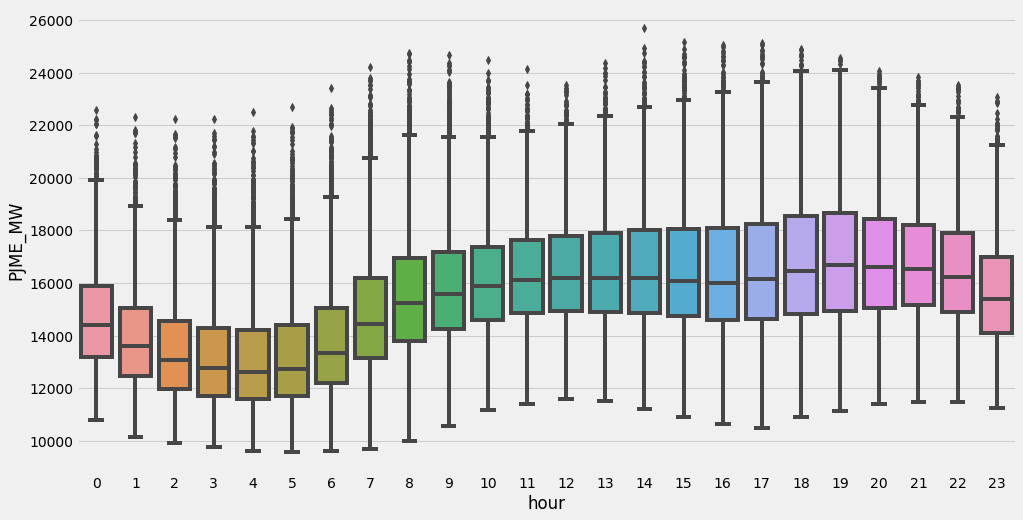

In [219]:
#By Hour
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data = df, x = 'hour', y = 'PJME_MW')
ax.set_title = 'MW by Hour'
plt.show()

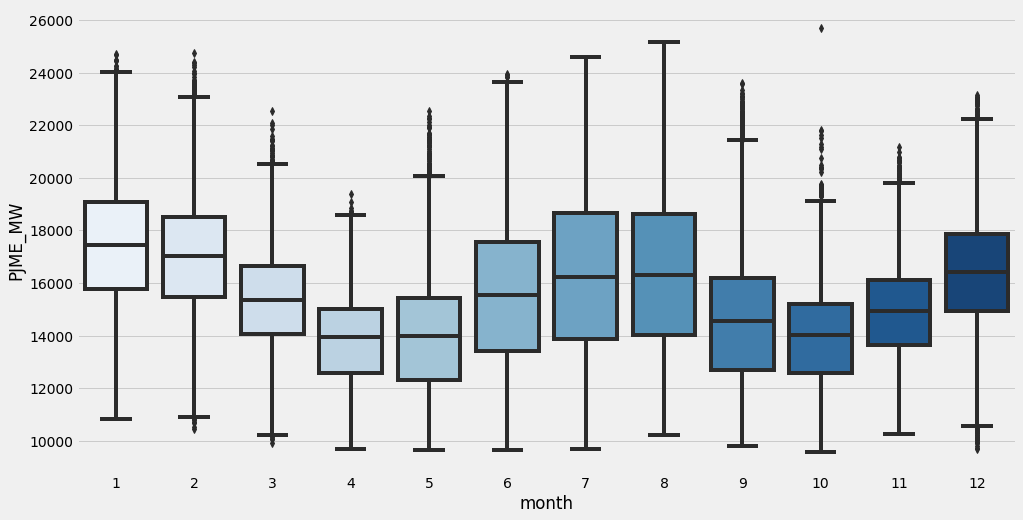

In [221]:
#By Month
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data = df, x = 'month', y = 'PJME_MW', palette='Blues')
ax.set_title = 'MW by Month'
plt.show()

Create our model

In [222]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweeok', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [223]:
# Define Features and Target
FEATURES = df.drop(columns=['PJME_MW']).columns
TARGET = 'PJME_MW'

In [224]:
# Define our training and test dataset
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [225]:
#
reg = xgb.XGBRegressor (n_estimators=1000,
                        early_stopping_rounds=50,
                        learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train),(X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:2557.05852	validation_1-rmse:2669.66874
[100]	validation_0-rmse:1667.99304	validation_1-rmse:1906.43321
[200]	validation_0-rmse:1388.41609	validation_1-rmse:1728.03964
[300]	validation_0-rmse:1260.06288	validation_1-rmse:1670.93868
[400]	validation_0-rmse:1170.54347	validation_1-rmse:1651.83339
[500]	validation_0-rmse:1113.48343	validation_1-rmse:1644.49126
[545]	validation_0-rmse:1091.20163	validation_1-rmse:1647.88201


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Feature Importance

In [226]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

fi

,importance
hour,0.397760
dayofweeok,0.167583
quarter,0.111998
month,0.136144
year,0.053410
dayofyear,0.133105


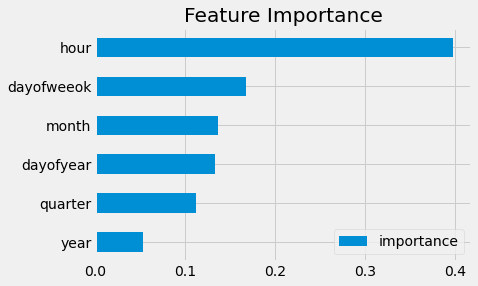

In [227]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Forecast on Test

In [228]:
#Predictions
test['prediction'] = reg.predict(X_test)

C:\Users\IGOR\AppData\Local\Temp\ipykernel_12448\2044651449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [229]:
# Merge prediction to df 
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

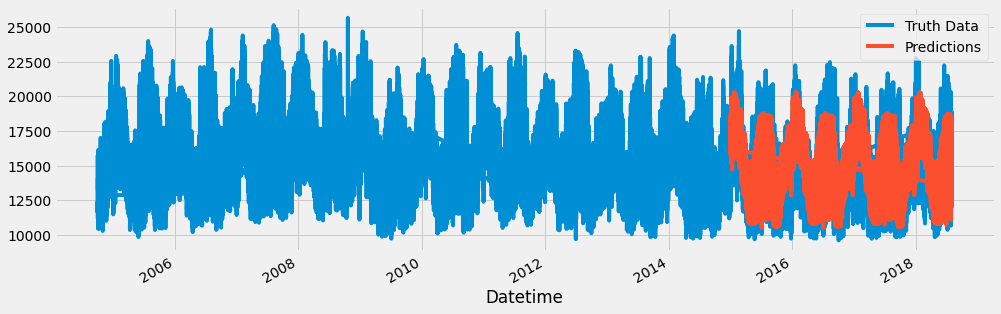

In [230]:
#Plot
ax = df[['PJME_MW']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax,style='-')
ax.legend(['Truth Data', 'Predictions'])
ax.set_title=('Raw Data and Predictions')
plt.show()


In [238]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on test set: {score:0.2f}')

RMSE Score on test set: 1644.39


Calculate Error

In [239]:
test['error'] = np.abs(test[TARGET] - test['prediction'])

In [240]:
test['date'] = test.index.date

In [241]:
# Top 5 Worse prediction days
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(5)

date
2017-01-22    4872.108968
2015-02-20    4861.401571
2015-02-19    4769.359985
2018-01-06    4403.549683
2017-02-07    4290.881022
Name: error, dtype: float64

In [242]:
# Top 5 Best prediction days
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(5)

date
2017-12-24    222.424520
2016-12-13    236.145426
2017-03-18    242.976603
2017-10-05    243.126994
2017-10-15    273.699788
Name: error, dtype: float64

Next Steps
- More robust cross validation
- Add more features (weather forecast, holidays)